In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [222]:
def get_data(d0,d1,r0,r1):

    dfl = pd.read_csv(d0,header=9)
    dfl.loc[dfl['Quality Code']!=10,'Value'] = np.nan
    dfl['#Timestamp'] = pd.to_datetime(dfl['#Timestamp'],infer_datetime_format=True)
    dfl['#Timestamp'] = dfl['#Timestamp'].dt.date
    dfl = dfl.set_index('#Timestamp')
    dfl = dfl.drop(columns=['Quality Code','Interpolation Type'])

    dfb = pd.read_csv(d1,header=9)
    dfb.loc[dfb['Quality Code']!=10,'Value'] = np.nan
    dfb['#Timestamp'] = pd.to_datetime(dfb['#Timestamp'],infer_datetime_format=True)
    dfb['#Timestamp'] = dfb['#Timestamp'].dt.date
    dfb = dfb.set_index('#Timestamp')
    dfb = dfb.drop(columns=['Quality Code','Interpolation Type'])

    dfdd = pd.merge(dfl,dfb, how='outer', left_index=True, right_index=True)
    dfdd = dfdd.rename(columns={"Value_x": "D0", "Value_y": "D1"})

    dfa = pd.read_csv(r0)
    dfa['#Timestamp'] = pd.to_datetime(dfa[['Year', 'Month', 'Day']])
    # dfa.loc[dfa['Quality']!='Y','Rainfall amount (millimetres)'] = np.nan
    dfa = dfa.set_index('#Timestamp')
    dfa = dfa.drop(columns=['Product code','Bureau of Meteorology station number','Year','Month','Day','Period over which rainfall was measured (days)','Quality'])

    dfb = pd.read_csv(r1)
    dfb['#Timestamp'] = pd.to_datetime(dfb[['Year', 'Month', 'Day']])
    # dfb.loc[dfb['Quality']!='Y','Rainfall amount (millimetres)'] = np.nan
    dfb = dfb.set_index('#Timestamp')
    dfb = dfb.drop(columns=['Product code','Bureau of Meteorology station number','Year','Month','Day','Period over which rainfall was measured (days)','Quality'])

    dfdr = pd.merge(dfa,dfb, how='outer', left_index=True, right_index=True)
    dfdr = dfdr.rename(columns={"Rainfall amount (millimetres)_x": "R0", "Rainfall amount (millimetres)_y": "R1"})

    df = pd.merge(dfdd,dfdr, how='outer', left_index=True, right_index=True)

    return df

In [223]:
# 329 km gages
# 101 to 44 m relief
# 0.1% slope
dfd = get_data('diamantina-lakes.csv',
               'diamantina-birdsville.csv',
               'davenport-downs-rain.csv',
               'birdsville-rain.csv')

# 32.4 km gages
# 251 to 185 m relief
# 0.3% slope
dfw = get_data('wonnangatta-crookedriver.csv',
               'wonnangatta-waterford.csv',
               'crookedriver-rain.csv',
               'waterford-rain.csv')


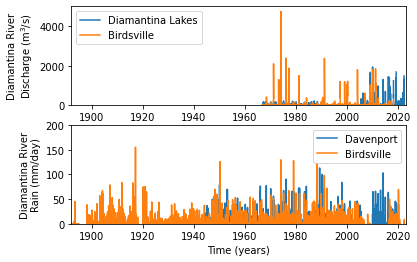

In [224]:
plt.subplot(211)
plt.plot(dfd.index.values,dfd['D0'],label='Diamantina Lakes')
plt.plot(dfd.index.values,dfd['D1'],label='Birdsville')
plt.xlim(dfd.index.values[0],dfd.index.values[-1])
plt.ylim(0,5e+3)
plt.xlabel('Time (years)')
plt.ylabel('Diamantina River\nDischarge (m$^3$/s)')
plt.legend()

plt.subplot(212)
plt.plot(dfd.index.values,dfd['R0'],label='Davenport')
plt.plot(dfd.index.values,dfd['R1'],label='Birdsville')
plt.xlim(dfd.index.values[0],dfd.index.values[-1])
plt.ylim(0,2e+2)
plt.xlabel('Time (years)')
plt.ylabel('Diamantina River\nRain (mm/day)')
plt.legend()

Text(0, 0.5, 'Diamantina River\nDischarge (m$^3$/s)')

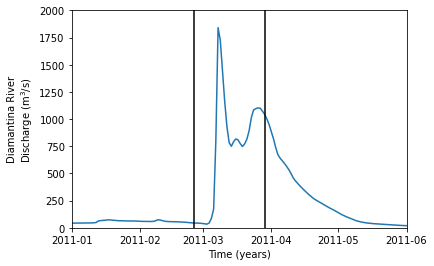

In [338]:
plt.plot(dfd.index.values,dfd['D1'],label='Birdsville')
plt.plot([pd.to_datetime('25-02-2011',dayfirst=True),
          pd.to_datetime('25-02-2011',dayfirst=True)],
         [0,2e+3],'k')
plt.plot([pd.to_datetime('29-03-2011',dayfirst=True),
          pd.to_datetime('29-03-2011',dayfirst=True)],
         [0,2e+3],'k')
plt.xlim(pd.to_datetime('01-01-2011',dayfirst=True),pd.to_datetime('01-06-2011',dayfirst=True))
plt.ylim(0,2e+3)
plt.xlabel('Time (years)')
plt.ylabel('Diamantina River\nDischarge (m$^3$/s)')

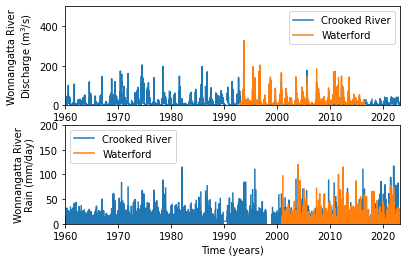

In [225]:
plt.subplot(211)
plt.plot(dfw.index.values,dfw['D0'],label='Crooked River')
plt.plot(dfw.index.values,dfw['D1'],label='Waterford')
plt.xlim(dfw.index.values[0],dfw.index.values[-1])
plt.ylim(0,5e+2)
plt.xlabel('Time (years)')
plt.ylabel('Wonnangatta River\nDischarge (m$^3$/s)')
plt.legend()

plt.subplot(212)
plt.plot(dfw.index.values,dfw['R0'],label='Crooked River')
plt.plot(dfw.index.values,dfw['R1'],label='Waterford')
plt.xlim(dfw.index.values[0],dfw.index.values[-1])
plt.ylim(0,2e+2)
plt.xlabel('Time (years)')
plt.ylabel('Wonnangatta River\nRain (mm/day)')
plt.legend()

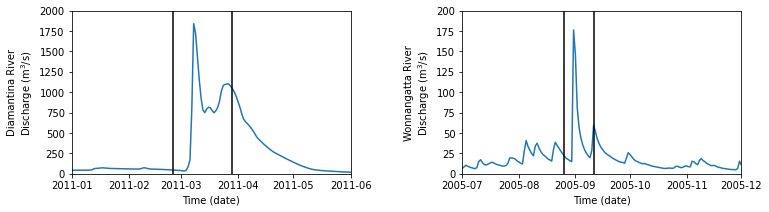

In [381]:
plt.figure(figsize=(12,3))

plt.subplot(121)
plt.plot(dfd.index.values,dfd['D1'],label='Birdsville')
plt.plot([pd.to_datetime('25-02-2011',dayfirst=True),
          pd.to_datetime('25-02-2011',dayfirst=True)],
         [0,2e+3],'k')
plt.plot([pd.to_datetime('29-03-2011',dayfirst=True),
          pd.to_datetime('29-03-2011',dayfirst=True)],
         [0,2e+3],'k')
plt.xlim(pd.to_datetime('01-01-2011',dayfirst=True),pd.to_datetime('01-06-2011',dayfirst=True))
plt.ylim(0,2e+3)
plt.xlabel('Time (date)')
plt.ylabel('Diamantina River\nDischarge (m$^3$/s)')

plt.subplot(122)
plt.plot(dfw.index.values,dfw['D0'],label='Waterford')
plt.plot([pd.to_datetime('26-08-2005',dayfirst=True),
          pd.to_datetime('26-08-2005',dayfirst=True)],
         [0,2e+2],'k')
plt.plot([pd.to_datetime('11-09-2005',dayfirst=True),
          pd.to_datetime('11-09-2005',dayfirst=True)],
         [0,2e+2],'k')
plt.ylim(0,2e+2)
plt.xlim(pd.to_datetime('01-07-2005',dayfirst=True),pd.to_datetime('01-12-2005',dayfirst=True))
plt.xlabel('Time (date)')
plt.ylabel('Wonnangatta River\nDischarge (m$^3$/s)')

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.savefig('comparison2.png',dpi=300,bbox_inches='tight')

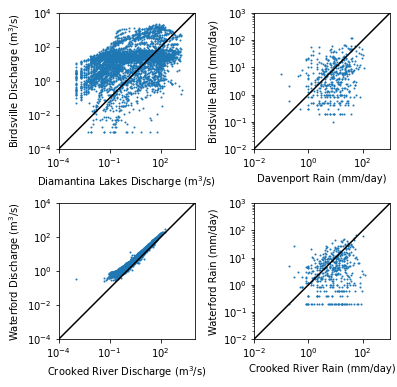

In [384]:
plt.figure(figsize=(6,6))

plt.subplot(221)
plt.scatter(dfd['D0'],dfd['D1'],s=1)
plt.plot([1e-4,1e+4],[1e-4,1e+4],'k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.xlim(1e-4,1e+4)
plt.ylim(1e-4,1e+4)
plt.xlabel('Diamantina Lakes Discharge (m$^3$/s)')
plt.ylabel('Birdsville Discharge (m$^3$/s)')

plt.subplot(222)
plt.scatter(dfd['R0'],dfd['R1'],s=1)
plt.plot([1e-2,1e+3],[1e-2,1e+3],'k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.xlim(1e-2,1e+3)
plt.ylim(1e-2,1e+3)
plt.xlabel('Davenport Rain (mm/day)')
plt.ylabel('Birdsville Rain (mm/day)')

plt.subplot(223)
plt.scatter(dfw['D0'],dfw['D1'],s=1)
plt.plot([1e-4,1e+4],[1e-4,1e+4],'k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.xlim(1e-4,1e+4)
plt.ylim(1e-4,1e+4)
plt.xlabel('Crooked River Discharge (m$^3$/s)')
plt.ylabel('Waterford Discharge (m$^3$/s)')

plt.subplot(224)
plt.scatter(dfw['R0'],dfw['R1'],s=1)
plt.plot([1e-2,1e+3],[1e-2,1e+3],'k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.xlim(1e-2,1e+3)
plt.ylim(1e-2,1e+3)
plt.xlabel('Crooked River Rain (mm/day)')
plt.ylabel('Waterford Rain (mm/day)')

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.savefig('comparison0.png',dpi=300,bbox_inches='tight')

In [383]:
# dr = np.concatenate((dfd['R0'].values,dfd['R1'].values))
dr = dfd['R1'].values
dr = dr[~np.isnan(dr)]
# wr = np.concatenate((dfw['R0'].values,dfw['R1'].values))
wr = dfw['R1'].values
wr = wr[~np.isnan(wr)]

# dd = np.concatenate((dfd['D0'].values,dfd['D1'].values))
dd = dfd['D1'].values
dd = dd[~np.isnan(dd)]
# wd = np.concatenate((dfw['D0'].values,dfw['D1'].values))
wd = dfw['D1'].values
wd = wd[~np.isnan(wd)]

print('rain dry %.2f%% diamantina'%(len(dr[dr==0])/len(dr)*100))
print('rain dry %.2f%% wannangatta'%(len(wr[wr==0])/len(wr)*100))

print('river dry %.2f%% diamantina'%(len(dd[dd==0])/len(dd)*100))
print('river dry %.2f%% wannangatta'%(len(wd[wd==0])/len(wd)*100))


rain dry 93.74% diamantina
rain dry 60.36% wannangatta
river dry 40.41% diamantina
river dry 0.00% wannangatta


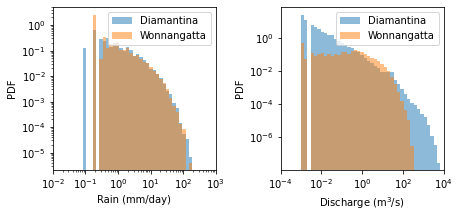

In [378]:
plt.figure(figsize=(7,3))

plt.subplot(121)
s = plt.hist(dr,bins=np.logspace(-2,3,50),density=True,log=True,alpha=0.5,label='Diamantina')
s = plt.hist(wr,bins=np.logspace(-2,3,50),density=True,log=True,alpha=0.5,label='Wonnangatta')
plt.xscale('log')
plt.xlim(1e-2,1e+3)
plt.xlabel('Rain (mm/day)')
plt.ylabel('PDF')
plt.legend()

plt.subplot(122)
s = plt.hist(dd,bins=np.logspace(-4,4,50),density=True,log=True,alpha=0.5,label='Diamantina')
s = plt.hist(wd,bins=np.logspace(-4,4,50),density=True,log=True,alpha=0.5,label='Wonnangatta')
plt.xscale('log')
plt.xlim(1e-4,1e+4)
plt.xlabel('Discharge (m$^3$/s)')
plt.ylabel('PDF')
plt.legend()

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.savefig('comparison1.png',dpi=300,bbox_inches='tight')

In [265]:
df0 = dfd.rename(columns={'D0':'Diamantina Lakes Discharge (m$^3$/s)',
                          'D1':'Birdsville Discharge (m$^3$/s)',
                          'R0':'Davenport Rain (mm/day)',
                          'R1':'Birdsville Rain (mm/day)'})
df0.to_csv('diamantina.csv')

df1 = dfw.rename(columns={'D0':'Crooked River Discharge (m$^3$/s)',
                          'D1':'Waterford Discharge (m$^3$/s)',
                          'R0':'Crooked River Rain (mm/day)',
                          'R1':'Waterford Rain (mm/day)'})
df1.to_csv('wonnangatta.csv')